In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from catboost import CatBoostRegressor
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
#from sklearn.svm import SVR

from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

#from sklearn.metrics import make_scorer

from matplotlib import pyplot
import seaborn as sns

In [2]:
# Basic Ordinal Encoded Dataset for Non-Linear Models
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')

X_o = ordinal.drop(['SalePrice'], axis=1).values
y_o = ordinal.SalePrice.values

scaler_o = StandardScaler()
X_o = scaler_o.fit_transform(X_o)

In [3]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../Data/BaseData.csv')

X_b = base.drop(['SalePrice'], axis=1).values
y_b = base.SalePrice.values

scaler_b = StandardScaler()
X_b = scaler_b.fit_transform(X_b)

In [4]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('cb', CatBoostRegressor(verbose=False)))
    #level0.append(('cart', DecisionTreeRegressor()))
    #level0.append(('svm', SVR()))
    # define meta learner model
    level1 = GradientBoostingRegressor()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5) 
    return model

In [5]:
def get_models():
    models = dict()
    models['cb'] = CatBoostRegressor(verbose=False) 
    models['gradient boost'] = GradientBoostingRegressor() 
    models['stacking'] = get_stacking() 
    return models

In [6]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [7]:
def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [8]:
df_cb = evaluate_model(CatBoostRegressor(verbose=False), X_o, y_o)

In [9]:
df_cb

,fit_time,score_time,test_r2,test_neg_mae
0,5.052222,0.012686,0.930637,-12458.598681
1,4.971679,0.012705,0.903094,-12068.154461
2,5.109332,0.011164,0.935673,-12285.637600
3,4.870954,0.013534,0.929734,-11867.911520
4,4.999295,0.011896,0.950324,-11318.734225


In [10]:
df_gbm = evaluate_model(GradientBoostingRegressor(), X_o, y_o)

In [11]:
df_gbm

,fit_time,score_time,test_r2,test_neg_mae
0,0.934897,0.001335,0.917604,-14273.330859
1,0.934804,0.001299,0.831319,-13979.651137
2,0.942021,0.001270,0.919332,-14156.107988
3,0.942383,0.001270,0.902700,-13557.214801
4,0.939984,0.001497,0.925318,-13499.393658


In [12]:
df_stack = evaluate_model(get_stacking(), X_b, y_b)

In [13]:
df_stack.describe()

,fit_time,score_time,test_r2,test_neg_mae
count,5.000000,5.000000,5.000000,5.000000
mean,37.585126,0.040443,0.908220,-12588.962210
std,0.488445,0.002624,0.045388,488.814865
min,36.898669,0.038135,0.828919,-13207.171544
25%,37.334051,0.038451,0.912699,-12976.334905
50%,37.714269,0.039676,0.926566,-12448.537744
75%,37.793576,0.041424,0.936235,-12277.939321
max,38.185063,0.044529,0.936683,-12034.827537


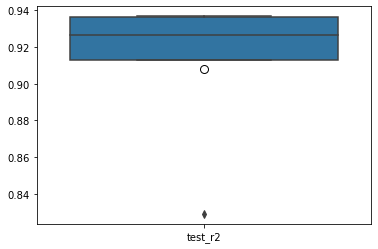

In [14]:
sns.boxplot(data=df_stack[['test_r2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});